<a href="https://colab.research.google.com/github/kmrakovcic/FoP_ML_workshop23/blob/master/05_mlLibraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tensorflow
TensorFlow is an open-source machine learning framework developed by Google. It provides a comprehensive ecosystem of tools, libraries, and resources that enable researchers, engineers, and developers to build and deploy machine learning models efficiently.

##Using tensorflow
Creating neural network in tensorflow is easy! First we import it as any other library.


In [42]:
import tensorflow as tf

Load and prepare the MNIST dataset. Tensorflow has its own way to download the MNIST dataset.

The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by 255.0. This also converts the sample data from integers to floating-point numbers:

In [43]:
import numpy as np
import pandas as pd
def one_hot_encode(label):
    # one hot encoding so we can compare output layer and labels
    num_classes = 10
    one_hot = np.zeros((num_classes, label.shape[0]))
    # create
    one_hot [label, range(label.shape[0])] = 1
    return one_hot.T


# Read comma separated files that contain train and test set from disk to pandas dataframe
mnist_train_df = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=None)
mnist_test_df = pd.read_csv("/content/sample_data/mnist_test.csv", header=None)

# Convert pandas dataframe to numpy array, and separate pixel values from labels
mnist_train_x = mnist_train_df.to_numpy()[:, 1:]/255
mnist_train_y = mnist_train_df.to_numpy()[:, 0]

mnist_test_x = mnist_test_df.to_numpy()[:, 1:]/255
mnist_test_y = mnist_test_df.to_numpy()[:, 0]

mnist_train_y = one_hot_encode(mnist_train_y)
mnist_test_y = one_hot_encode(mnist_test_y)

To create a neural network model, we use layers submodule. Type of the layer we encountered before are called [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense). We build layers one after another inside the `tf.keras.models.Sequential` model. `Sequential` is useful for stacking layers where each layer has one input tensor and one output tensor.

Some of the arguments of the Dense layer are:

`tf.keras.layers.Dense(units, activation=None)`

Where:
* units: Positive integer, dimensionality of the output space.
* activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).

If ever stuck, best check Tensorflow [documentation](https://www.tensorflow.org/api_docs/python/tf/all_symbols).



In [44]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=16, activation="sigmoid", input_shape=(784,)),
  tf.keras.layers.Dense(units=16, activation="sigmoid"),
  tf.keras.layers.Dense(units=10, activation="sigmoid"),
])

More robust way is to create model with functional declaration:

In [45]:
layer = tf.keras.Input (784)
layer1 = tf.keras.layers.Dense (units=16, activation="sigmoid") (layer)
layer2 = tf.keras.layers.Dense (units=16, activation="sigmoid") (layer1)
layer_o= tf.keras.layers.Dense (units=10, activation="sigmoid") (layer2)

model = tf.keras.Model (inputs=layer, outputs=layer_o)

Before you start training, configure and compile the model using Keras `Model.compile`. Set the optimizer class to `adam`, set the loss to the mean square error `mse`. Addditional [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses) and [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) are available in tensorflow.

In [46]:
model.compile(optimizer='adam', loss="mse")

Now we can fit the model.

In [ ]:
model.fit(x=mnist_train_x, y=mnist_train_y, epochs=50)

Calculating the accuracy on the test set:

In [49]:
p_labels = model(mnist_test_x)
p_labels = np.argmax(p_labels, axis=-1)
y_labels = np.argmax(mnist_test_y, axis=-1)
accuracy = (y_labels == p_labels).sum()/y_labels.shape[0]
print ("Test accuracy:", accuracy)

Test accuracy: 0.9341


# Dimensionality reduction

Dimensionality reduction is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data.

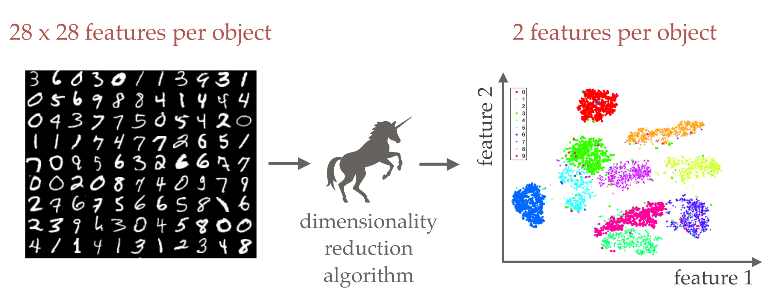

**Science is all about compression**

In physics, we are usually trying to extract simplicity from the observerd complex world. Traditionaly the stellar sequence is one way astrophysicists found how to compress the data from stars on the 2D plot.

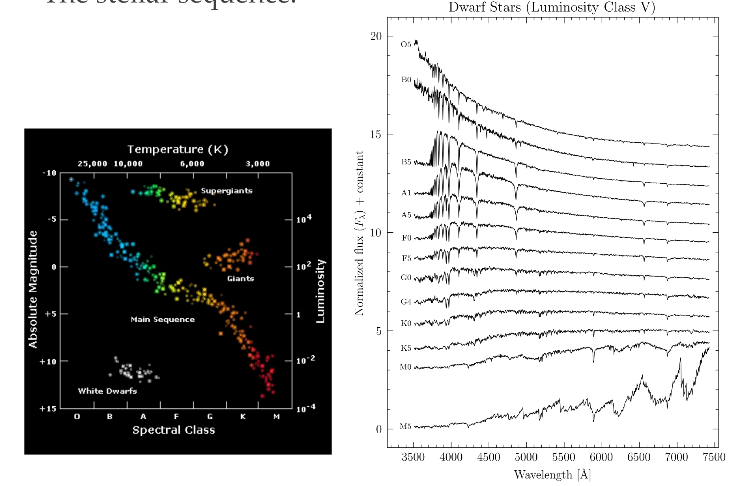

Dimensionality reduction is a powerful technique widely used in various fields, including data analysis, machine learning, and scientific research. It involves the transformation of high-dimensional data into a lower-dimensional representation while preserving essential information.

One significant advantage of dimensionality reduction is its ability to simplify complex datasets, making them more manageable and comprehensible. By reducing the number of variables, the remaining dimensions can better capture the intrinsic structure and patterns within the data, aiding in visualization and interpretation. Additionally, dimensionality reduction can contribute to improving computational efficiency by reducing the storage and processing requirements for large datasets.

Another objective of dimensionality reduction is to alleviate the curse of dimensionality, where datasets with numerous variables suffer from increased computational complexity, reduced interpretability, and the potential for overfitting.

Techniques like principal component analysis (PCA) have been employed to identify the most significant variables and reduce the data to its essential components, aiding in particle identification, event classification, and anomaly detection.

https://youtu.be/QXOkPvFM6NU?t=219